# **PHASE 2 MILESTONE 1**

# **HAIDAR FARRAS LATIEF - FTDS 002**

# **I. Introduction**

Selamat datang pada pengerjaan Milestone 1 fase 2 oleh Haidar Farras Latief pada FTDS - 002 ini. Pada Milestone 1 fase 2 ini, saya diminta untuk melakukan prediksi data churn (Berhentinya customer membeli jasa yang ditawarkan oleh perusahaan), memakai model deep learning.

# **II. IMPORT LIBRARIES & DATA LOADING**

In [ ]:
# Install ini untuk bisa membuka gambar penjelasan training model deep learning, restart jika sudah terinstall
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 1. Essential for data analysist with python
# 1.1 Importing numpy for array number handling
import numpy as np
# 1.2 Importing pandas for table handling
import pandas as pd
# 1.3 Importing matplotlib.pyplot for statistics visualization
import matplotlib.pyplot as plt
# 1.4 Importing seaborn for matplotlib.pyplot visualization support
import seaborn as sns

# 2. Data Pre-processing
# 2.1 To split between train data and test data
from sklearn.model_selection import train_test_split
# 2.2 Untuk melakukan test korealsi
from sklearn.feature_selection import SelectKBest
# 2.3 Untuk melakukan test korelasi chi square
from sklearn.feature_selection import chi2
# 2.4 untuk melakukan encoding dengan metode OneHot
from sklearn.preprocessing import OneHotEncoder
# 2.5 To perform scaling with MinMax method
from sklearn.preprocessing import MinMaxScaler

# 3. Training the model
# 3.1 tensorflow to train models
import tensorflow as tf
# 3.2 To run neural network
from tensorflow import keras
# 3.3 To run neural network models
from keras.models import Sequential, Model, load_model
# 3.4 To 
from keras.layers import Input, Dense, Dropout
# 3.9 To calculate the running time of the code
from time import time

# 4. Model Evaluation
# 4.1 To evaluate the algorithm model
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

# 5. Comparing Models
# 5.1 To carry out repeated evaluations
from sklearn.model_selection import StratifiedKFold
# 5.2 To carry out assessment after evaluation
from sklearn.model_selection import cross_val_score
# 5.3 To perform Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# 5.4 To do model evaluation
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

# 6. Data Inference
# 6.1 To create pipeline
from sklearn.pipeline import Pipeline, make_pipeline
# 6.2 To support pipeline in data inference
from sklearn.compose import ColumnTransformer

# 7. Deployment
# 7.1 To deploy
import pickle

# **III. DATA LOADING**

## 3.1 Connecting dataset with this file

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.tail(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# getting the dataframe general information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3.2 Handling Invalid data type

In [ ]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

The data type for TotalCharges should be float64, because:

In [ ]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

All values in TotalCharges are numerical.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


I'm trying to change data type with:
```
df = df.astype({'TotalCharges': 'float64'})
```
or
```
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
```
but it doesn't work because there's value with only space like " " or ' ', so the first solution is to use to_numeric with parameter 'errors'= 'ignore'.
```
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'ignore')
```
but it doesn't change value type of the data and I want to examine the kind of data that have this type of value. So I'm using 'errors'= 'coerce"

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

So what 'errors' = 'coerce' do ?

According to https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

there's one parameters called 'errors', in 'errors' there's 3 options:

1. 'raise', it will show error when theres invalid values
2. 'ignore', it will ignore invalid values but still not erasing or changing it, the data type still not changed if there's invalid values.
3. 'coerce', it will change all invalid data to 'NaN', in this way I can examine what makes this invalid values become invalid.

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_null_totalcharges = pd.isnull(df['TotalCharges'])
df[df_null_totalcharges]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# **IV. DATA CLEANING**

## 4.1 Unnecessary Feature Drop

In [ ]:
df.dropna(inplace=True)

Dari bagian sebelumnya, terdapat data-data yang kosong atau null. Maka itu akan dihapus atau di drop sehingga memperlancar proses data.

## 4.2 Invalid Data Drop

In [ ]:
df.drop(columns = 'customerID', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# **V. EXPLORATORY DATA ANALYSIS (EDA)**

## 5.1 Target Data Balance

In [ ]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df_shw = df.copy(deep=True)

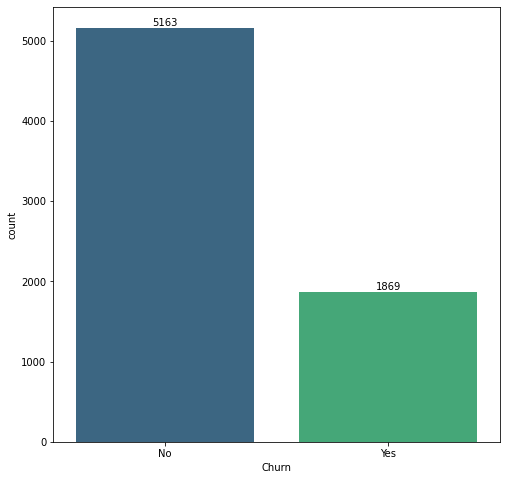

In [ ]:
# membuat grafik countplot untuk melihat keseimbangan data target

plt.figure(figsize=(8,8))
c = sns.countplot(data=df, x='Churn', palette='viridis')
c.bar_label(c.containers[0], label_type='edge');

Data Churn
```
No = 73,51%
Yes = 26,49%
```
Terlihat bahwa data agak tidak seimbang atau mild imbalance, dengan itu diperlukan downsampling.

## 5.2 Churn balance distribution in other features

Berikut dibawah ini merupakan distribusi data target pada masing-masing fitur:

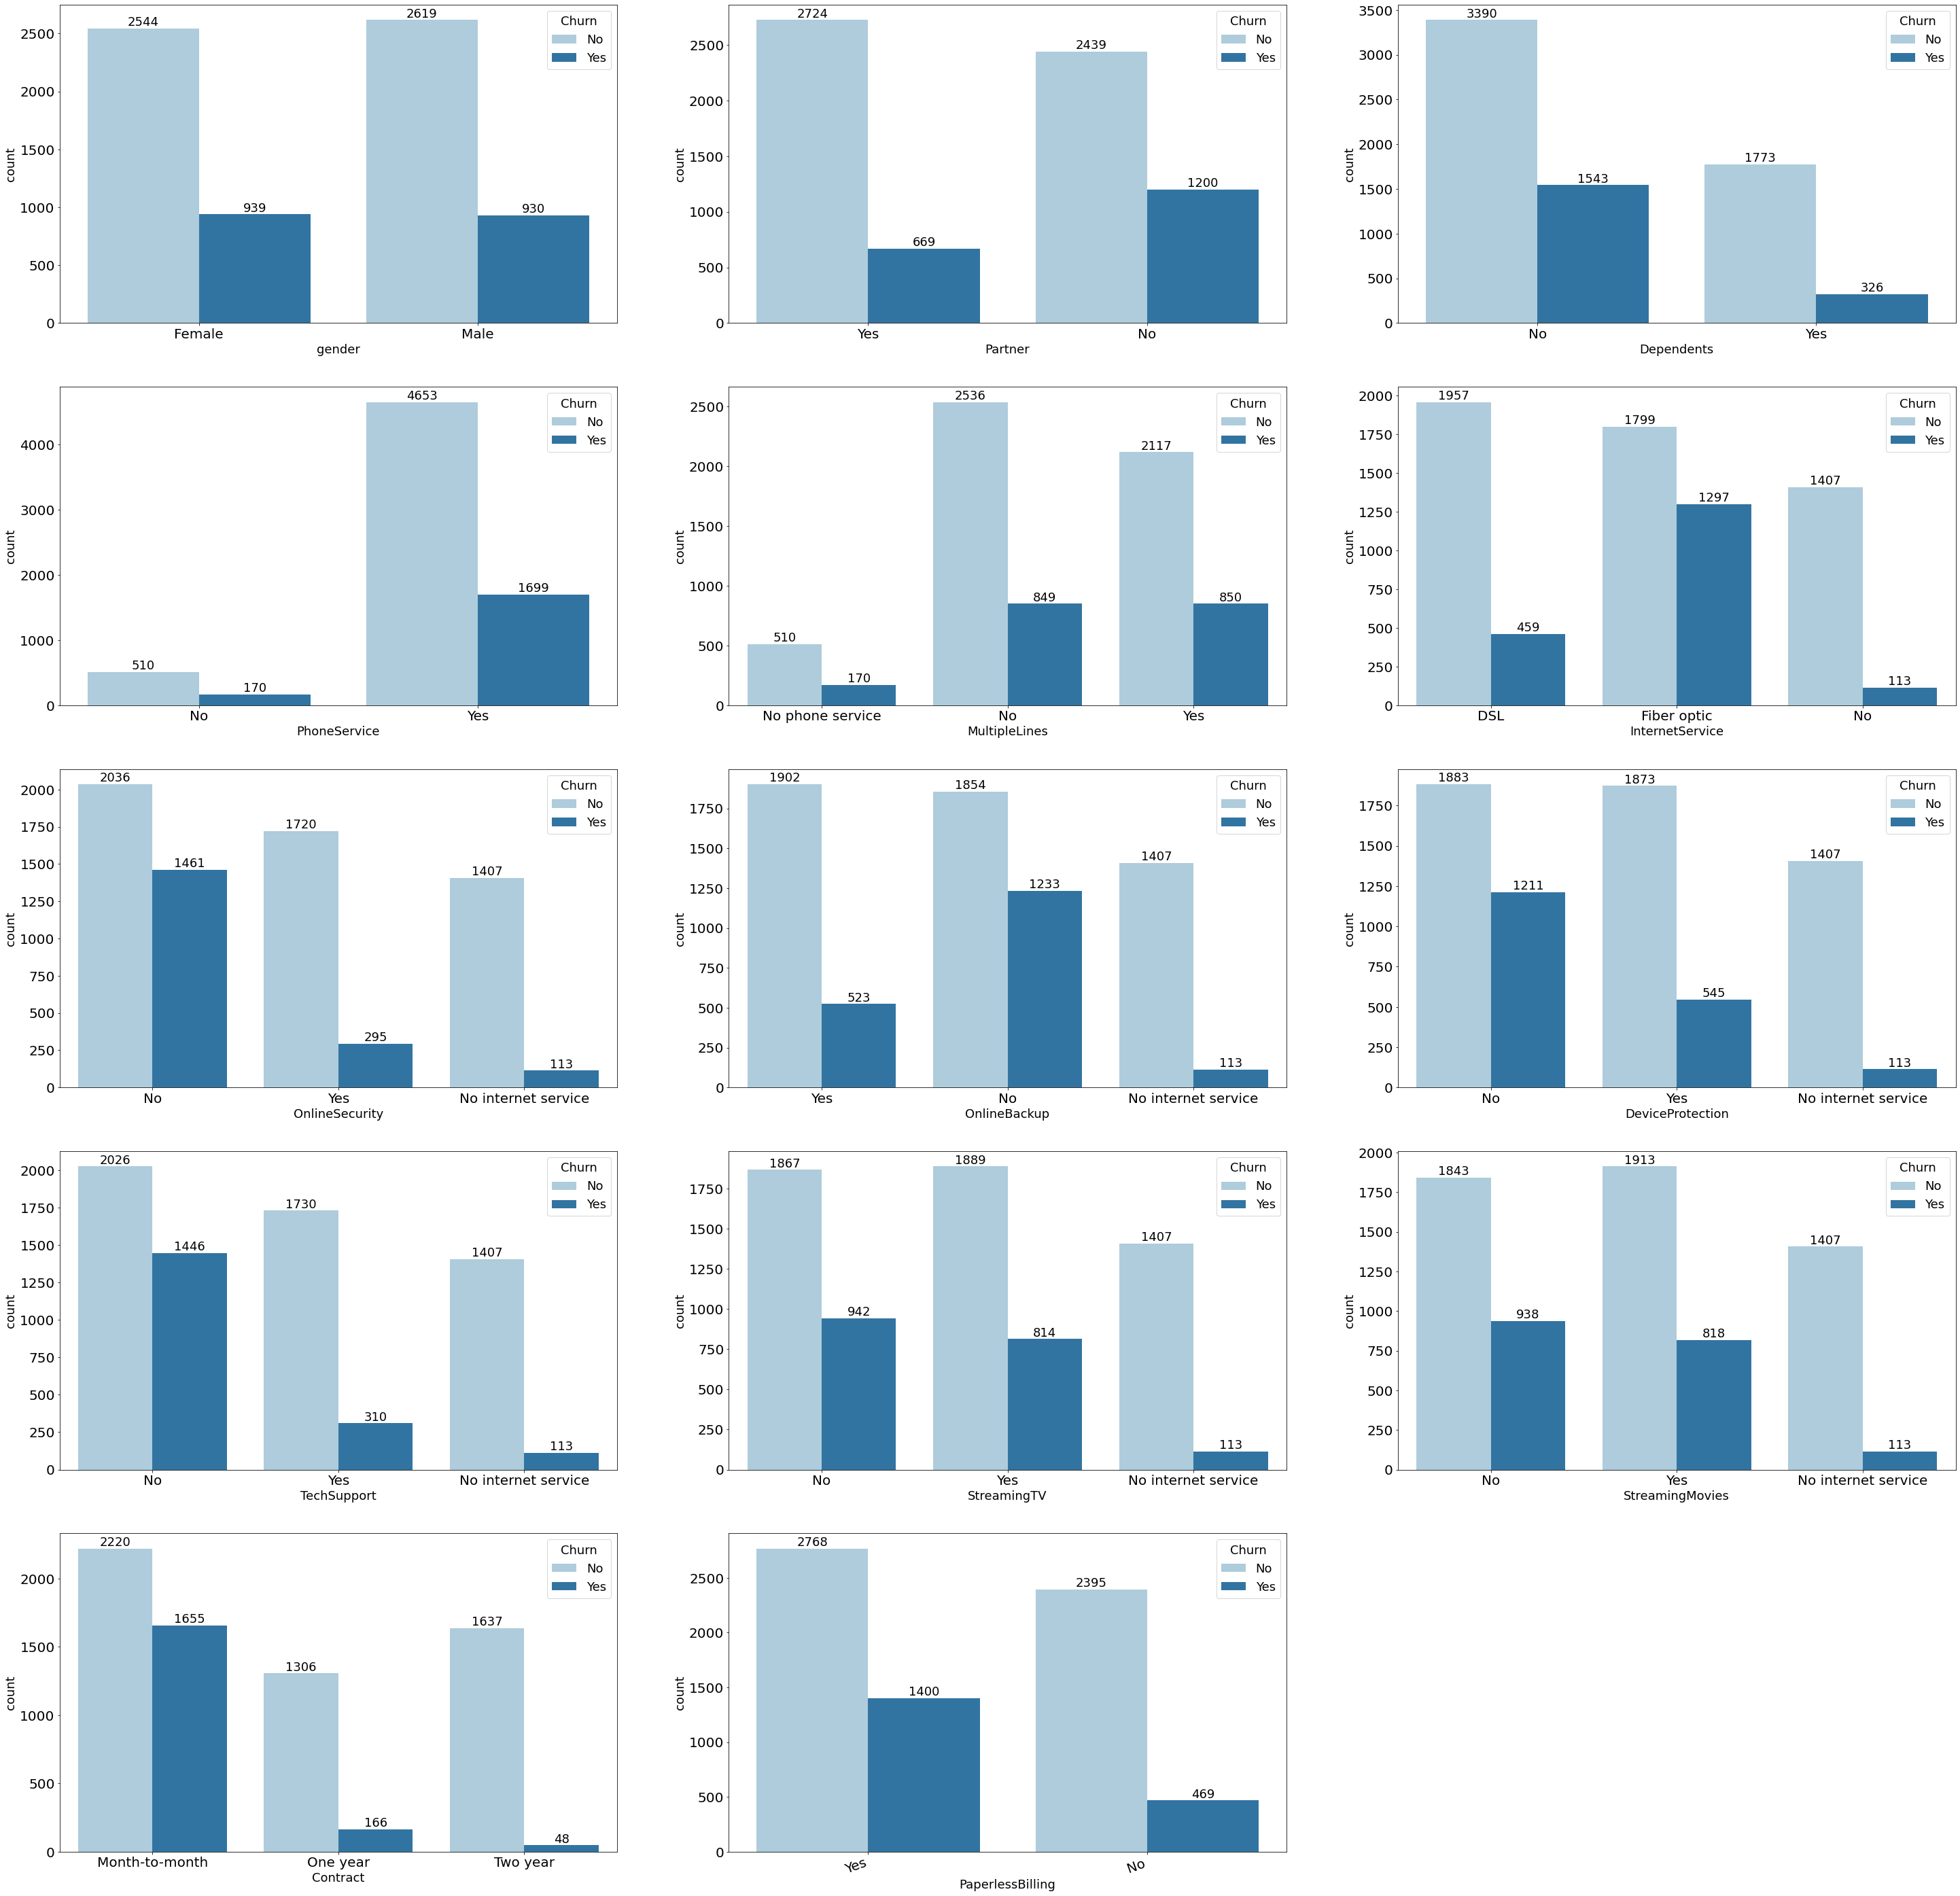

In [ ]:
plt.figure(figsize=(50,50))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 18})
for col in range(len(df.select_dtypes(include='object').columns[:-2])):
    plt.subplot(5,3,col+1)
    ax = sns.countplot(data=df, x=df[df.select_dtypes(include='object').columns[col]], hue='Churn', palette='Paired')
    for i in ax.containers:
        ax.bar_label(i,)
plt.xticks(rotation=20, ha='right');

# **VI. DATA PREPROCESSING**

## 6.1 Handling Data Imbalance

Seperti yang saya bahas pada bagian 5.1, berikut ini saya akan melakukan downsampling supaya data lebih target seimbang.

In [ ]:
# Untuk melakukan downsampling
from sklearn.utils import resample

In [ ]:
# Separate majority and minority classes
df_majority = df[df.Churn== 'No']
df_minority = df[df.Churn== 'Yes']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,      # sample without replacement
                                 n_samples=4500,     # to match minority class
                                 random_state=114)   # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
df_downsampled.Churn.value_counts()

No     4500
Yes    1869
Name: Churn, dtype: int64

Data Churn
```
No = 70,79%
Yes = 29,21%
```
Terlihat bahwa data target lebih seimbang dari sebelumnya.

## 6.2 Handling Outlier

### 6.2.1 Define Observation Function

#### 6.2.1.1 diagnostic_plots

In [ ]:
# menampilkan histogram dan boxplot

def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

#### 6.2.1.2 find_skewed_boundaries

In [ ]:
# menampilkan garis bawah dan atas pada data ini
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

### 6.2.2 Handling Outlier Observation

#### 6.2.2.2 tenure

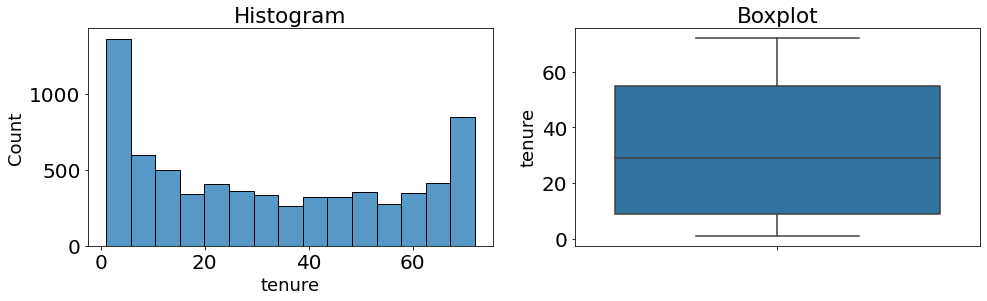


Nama variabel: tenure

Nilai Skewness:  0.23773083190513133
Batas atas tenure: 124.0
Batas bawah tenure: -60.0

Outliers atas tenure : 0
Outliers bawah tenure : 0


In [ ]:
diagnostic_plots(df, 'tenure')
print('\nNama variabel: tenure')
print('\nNilai Skewness: ', df['tenure'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(df, 'tenure', 1.5)
skew_upper_bound, skew_lower_bound

print('Batas atas tenure:',skew_upper_bound)
print('Batas bawah tenure:',skew_lower_bound)
print('')
print('Outliers atas tenure : {}'.format(len(df[df['tenure'] > skew_upper_bound])))
print('Outliers bawah tenure : {}'.format(len(df[df['tenure'] < skew_lower_bound])))

#### 6.2.2.3 MonthlyCharges

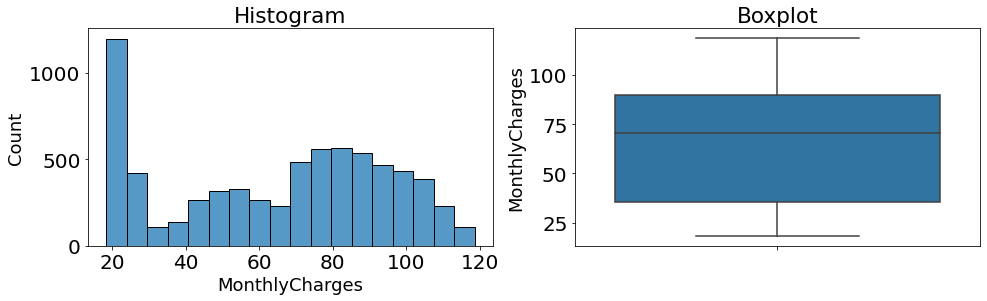


Nama variabel: MonthlyCharges

Nilai Skewness:  -0.22210292770166232
Batas atas MonthlyCharges: 171.27499999999998
Batas bawah MonthlyCharges: -45.824999999999996

Outliers atas MonthlyCharges : 0
Outliers bawah MonthlyCharges : 0


In [ ]:
diagnostic_plots(df, 'MonthlyCharges')
print('\nNama variabel: MonthlyCharges')
print('\nNilai Skewness: ', df['MonthlyCharges'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(df, 'MonthlyCharges', 1.5)
skew_upper_bound, skew_lower_bound

print('Batas atas MonthlyCharges:',skew_upper_bound)
print('Batas bawah MonthlyCharges:',skew_lower_bound)
print('')
print('Outliers atas MonthlyCharges : {}'.format(len(df[df['MonthlyCharges'] > skew_upper_bound])))
print('Outliers bawah MonthlyCharges : {}'.format(len(df[df['MonthlyCharges'] < skew_lower_bound])))

#### 6.2.2.4 TotalCharges

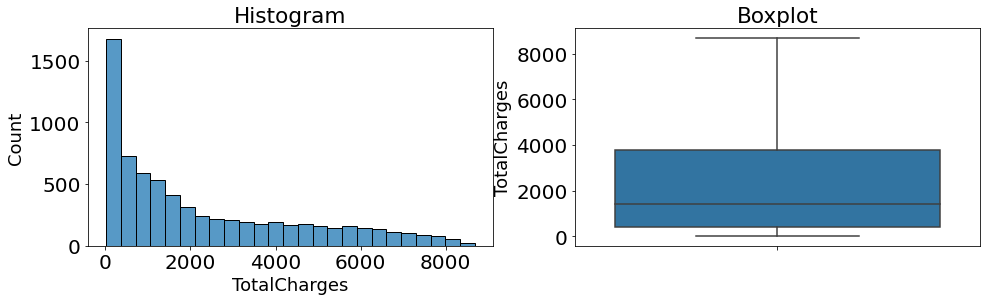


Nama variabel: TotalCharges

Nilai Skewness:  0.9616424997242504
Batas atas TotalCharges: 8884.66875
Batas bawah TotalCharges: -4688.481250000001

Outliers atas TotalCharges : 0
Outliers bawah TotalCharges : 0


In [ ]:
diagnostic_plots(df, 'TotalCharges')
print('\nNama variabel: TotalCharges')
print('\nNilai Skewness: ', df['TotalCharges'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(df, 'TotalCharges', 1.5)
skew_upper_bound, skew_lower_bound

print('Batas atas TotalCharges:',skew_upper_bound)
print('Batas bawah TotalCharges:',skew_lower_bound)
print('')
print('Outliers atas TotalCharges : {}'.format(len(df[df['TotalCharges'] > skew_upper_bound])))
print('Outliers bawah TotalCharges : {}'.format(len(df[df['TotalCharges'] < skew_lower_bound])))

### 6.2.3 Conclusion

Terlihat bahwa tidak data yang berada pada luar outlier sehingga tidak dibutuhkan capping/winsorizer/pemotongan data.

## 6.3 Feature Selection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df = df.astype({'SeniorCitizen': 'object'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [ ]:
df['Churn'] = df['Churn'].replace(['Yes'], '1')
df['Churn'] = df['Churn'].replace(['No'], '0')
df['Churn'] = pd.to_numeric(df['Churn'], errors = 'coerce')

### 6.3.1 Splitting Numerical and Categorial Data

In [ ]:
# memisahkan data numerik
num_cols_for_feature_select = df.select_dtypes(include=np.number).columns.to_list()
# memisahkan data kategorial
cat_cols_for_feature_select = df.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_cols_for_feature_select)
print('Categorical Columns:', cat_cols_for_feature_select)

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# num_cols_for_feature_select['Churn'] = df.Churn

In [ ]:
df_num = df[num_cols_for_feature_select]
df_cat = df[cat_cols_for_feature_select]
df_cat_targ = df_num['Churn']

df_num.drop(columns='Churn', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 6.3.2 Correlation Observation

#### 6.3.2.1 Heatmap for Numerical data

<AxesSubplot: >

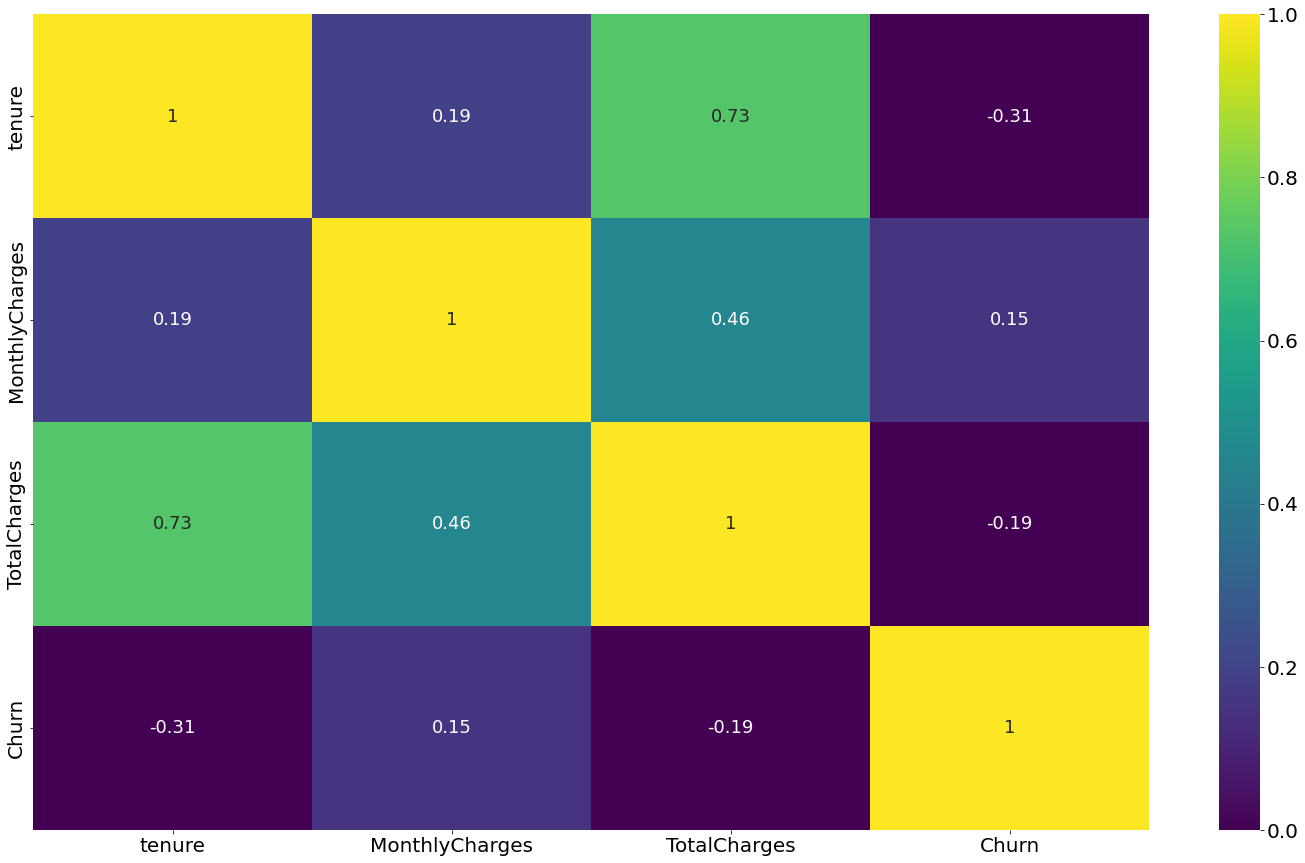

In [ ]:
# Memilh ukuran visualisasi
fig = plt.figure(figsize = (25, 15))
# menyiapkan heatmap
sns.heatmap(df.corr(method = 'kendall'),
            vmin = 0,
            vmax = 1,
            annot = True,
            cmap='viridis')

#### 6.3.2.2 Chi-square test for categorical data

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
dtypes: object(16)
memory usage: 1.2+ MB


In [ ]:
# Untuk melakukan encoding secara ordinal
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Membuat duplikat untuk melakukan pengamatan korelasi
df_ftr_slc_cat = df_cat.copy(deep=True)

# Fungsi untuk memakai encoder ordinal
oec = OrdinalEncoder()

# Encode data
oec.fit(df_ftr_slc_cat[[
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

# Penerapan encode data
df_ftr_slc_cat[[
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']] = oec.transform(df_ftr_slc_cat[[
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']])

# Melihat 2 data awal
df_ftr_slc_cat.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0


In [ ]:
# Membuat definisi chi square
test = SelectKBest(score_func=chi2, k=4)
# memasukan kalkulasi fit
fit = test.fit(df_ftr_slc_cat, df_cat_targ)
# memperliahtkan nilai hasil
fit.scores_

array([2.54297062e-01, 1.33482766e+02, 8.18577694e+01, 1.31271509e+02,
       9.29483891e-02, 9.73596015e+00, 9.71526930e+00, 5.50437364e+02,
       2.29441123e+02, 1.90688004e+02, 5.22164716e+02, 7.37323437e+00,
       8.35762354e+00, 1.11175905e+03, 1.04979224e+02, 5.92405068e+01])

In [ ]:
# membulatkan hasil nilai
np.round_(fit.scores_)

array([   0.,  133.,   82.,  131.,    0.,   10.,   10.,  550.,  229.,
        191.,  522.,    7.,    8., 1112.,  105.,   59.])

In [ ]:
#menyesuaikan dengan fitur ketegorial
chi = pd.Series(fit.scores_)
chi.index = df_ftr_slc_cat.columns
chi.sort_values(ascending=False)

Contract            1111.759054
OnlineSecurity       550.437364
TechSupport          522.164716
OnlineBackup         229.441123
DeviceProtection     190.688004
SeniorCitizen        133.482766
Dependents           131.271509
PaperlessBilling     104.979224
Partner               81.857769
PaymentMethod         59.240507
MultipleLines          9.735960
InternetService        9.715269
StreamingMovies        8.357624
StreamingTV            7.373234
gender                 0.254297
PhoneService           0.092948
dtype: float64

#### 6.3.2.3 Feature Selection Conclusion

From corellation we have coclusion to drop some feature:

1. gender: 0.25
2. PhoneService: 0.09
3. MonthlyCharges: 0.15

In [ ]:
df_drp = df.drop(['gender','PhoneService','MonthlyCharges'], axis=1)

## 6.4 Separating Data

In [ ]:
# Define feature and target
X = df_drp.drop(columns='Churn', axis=1)
y = df_drp['Churn']
X

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.50
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.90
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.60


In [ ]:
# memisahkan data train dengan test

train, test = train_test_split(df_drp, test_size=0.2, stratify=y, random_state=114)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (5625, 17)
Test size:  (1407, 17)


In [ ]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']

X_test = test.drop(columns='Churn')
y_test = test['Churn']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, stratify=y_train)
print('Val Size  : ', X_val.shape)

Val Size  :  (1125, 16)


In [ ]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['tenure', 'TotalCharges']
Categorical Features: ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

## 6.5 Scaling and Encoding

### 6.5.1 Scaling

In [ ]:
X_train_num

,tenure,TotalCharges
2002,54,2460.55
2477,3,244.85
1000,7,660.90
1292,62,5193.20
4370,21,1714.95
...,...,...
2118,22,1790.65
6509,1,25.05
6206,52,5088.40
5901,49,4254.85


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scld = scaler.transform(X_train_num)
X_test_num_scld = scaler.transform(X_test_num)
X_val_num_scld = scaler.transform(X_val_num)

X_train_num_scld

array([[0.74647887, 0.28176206],
       [0.02816901, 0.0260847 ],
       [0.08450704, 0.07409416],
       ...,
       [0.71830986, 0.58499885],
       [0.67605634, 0.4888126 ],
       [0.50704225, 0.37257674]])

### 6.5.2 Encoding

In [ ]:
X_train_cat

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2002,0,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,Two year,No,Credit card (automatic)
2477,0,No,No,No,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Mailed check
1000,0,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
1292,0,No,No,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic)
4370,0,Yes,No,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0,Yes,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
6509,1,Yes,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check
6206,0,Yes,No,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic)
5901,0,Yes,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check


In [ ]:
# feature encoding menggunakan OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
X_val_cat_enc = encoder.transform(X_val_cat).toarray()

X_train_cat_enc

array([[1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

### 6.5.3 Compaling encoded and scaled column

In [ ]:
# menggabungkan kolom numerikal yang sudah di-scaled dengan kolom kategorikal yang sudah di-encoded

X_train_final = np.concatenate([X_train_num_scld, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scld, X_test_cat_enc], axis=1)
X_val_final = np.concatenate([X_val_num_scld, X_val_cat_enc], axis=1)

X_train_final

array([[0.74647887, 0.28176206, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.02816901, 0.0260847 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08450704, 0.07409416, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.71830986, 0.58499885, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.67605634, 0.4888126 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.50704225, 0.37257674, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [ ]:
# membuat dataframe untuk X_train_final

X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)
X_val_final_df = pd.DataFrame(X_val_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.746479,0.281762,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.028169,0.026085,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.084507,0.074094,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.859155,0.597092,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.281690,0.195725,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.295775,0.204460,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4496,0.000000,0.000721,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4497,0.718310,0.584999,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4498,0.676056,0.488813,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_train

2002    0
2477    0
1000    1
1292    0
4370    0
       ..
2118    0
6509    1
6206    0
5901    1
888     0
Name: Churn, Length: 4500, dtype: int64

In [ ]:
# membuat dataframe untuk y_train

y_train_df = pd.DataFrame(y_train)
y_train_df

,Churn
2002,0
2477,0
1000,1
1292,0
4370,0
...,...
2118,0
6509,1
6206,0
5901,1


# **VII. DEEP LEARNING MODELING**

## 7.1 Pipeline Architecture

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train))
train_dataset = train_dataset.shuffle(buffer_size=3000, seed=1).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
test_dataset = test_dataset.batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val))
val_dataset = val_dataset.batch(32)

## 7.2 Sequential Model

### 7.2.1 Defining Sequential Model

In [ ]:
# Setting the neuron
n_nrn_sq = (35, 15)

# Sequential Model Architecture
mdl_sq = Sequential()

# Input layer
n_feature = X_train_final.shape[1]
mdl_sq.add(Input(shape=(n_feature, ))) 

# Hidden layer
for n in n_nrn_sq:  
    mdl_sq.add(Dense(n, activation='relu'))

# Output layer
mdl_sq.add(Dense(1, activation='sigmoid'))  

# Set the optimizer
opt_sq = tf.keras.optimizers.Adam()

# Compiling the model
mdl_sq.compile(
    optimizer = opt_sq, 
    loss = 'binary_crossentropy', 
    metrics = ['accuracy']
    )

In [ ]:
# Model summary
mdl_sq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                1470      
                                                                 
 dense_1 (Dense)             (None, 15)                540       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 2,026
Trainable params: 2,026
Non-trainable params: 0
_________________________________________________________________


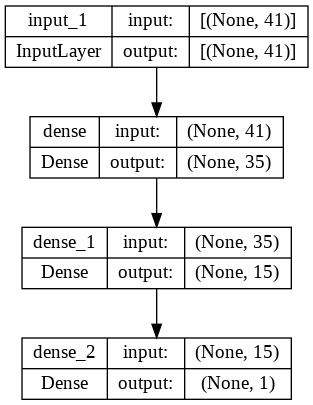

In [ ]:
# Model plotting
tf.keras.utils.plot_model(mdl_sq, show_shapes=True, show_layer_names=True)

### 7.2.2 Training Sequential Model

In [ ]:
#  Training the model
history_sq_default=mdl_sq.fit(train_dataset, validation_data=(val_dataset), epochs = 100)


Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.7556 - val_loss: 0.4398 - val_accuracy: 0.7893
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7938 - val_loss: 0.4287 - val_accuracy: 0.7991
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.7998 - val_loss: 0.4250 - val_accuracy: 0.8018
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.8042 - val_loss: 0.4220 - val_accuracy: 0.8009
Epoch 5/100
141/141 [==============================] - 1s 5ms/step - loss: 0.4168 - accuracy: 0.8029 - val_loss: 0.4202 - val_accuracy: 0.8036
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8064 - val_loss: 0.4183 - val_accuracy: 0.7982
Epoch 7/100
141/141 [==============================] - 1s 7ms/step - loss: 0.4120 - accuracy: 0.8096 - val_loss: 0.4254 - val_accuracy: 0.8044

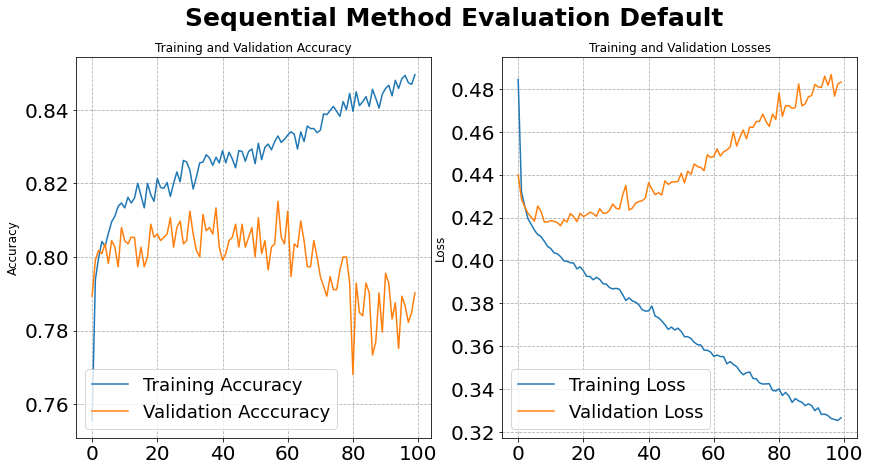

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
fig.suptitle('Sequential Method Evaluation Default', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq_default.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq_default.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq_default.history['loss'], label="Training Loss")
plt.plot(history_sq_default.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [ ]:
mdl_sq.trainable = False

### 7.2.3 Tuned Sequential Model (Part 1 from 2)

In [ ]:
n_nrn_sq_tnd_1 = (50, 35) # jumlah neuron di hidden layer adalah 16 dan 8

# Arsitektur Model Sequential
n_feature = X_train_final.shape[1]
mdl_sq_tnd_1 = Sequential()
mdl_sq_tnd_1.add(Input(shape=(n_feature, )))       # Input Layer

for n in n_nrn_sq_tnd_1:                           # Hidden Layer
    mdl_sq_tnd_1.add(Dense(n, activation='relu'))

mdl_sq_tnd_1.add(Dense(1, activation='sigmoid'))   # Output Layer

mdl_sq_tnd_1.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        beta_1=0.5,
        beta_2=0.888
        ), 
    metrics='accuracy'
    )

In [ ]:
mdl_sq_tnd_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                2100      
                                                                 
 dense_4 (Dense)             (None, 35)                1785      
                                                                 
 dense_5 (Dense)             (None, 1)                 36        
                                                                 
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________


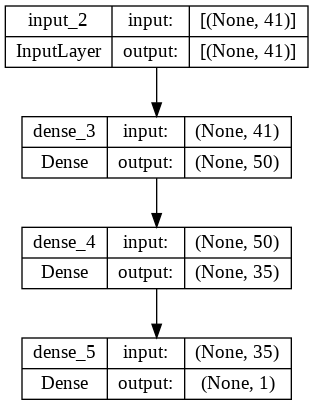

In [ ]:
# Model plotting
tf.keras.utils.plot_model(mdl_sq_tnd_1, show_shapes=True, show_layer_names=True)

In [ ]:
#  Training the model
history_sq_tnd_1 = mdl_sq_tnd_1.fit(train_dataset, validation_data=(val_dataset), epochs = 100)

Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.6336 - accuracy: 0.6618 - val_loss: 0.5671 - val_accuracy: 0.7324
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.5299 - accuracy: 0.7342 - val_loss: 0.5043 - val_accuracy: 0.7387
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7460 - val_loss: 0.4716 - val_accuracy: 0.7636
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7711 - val_loss: 0.4539 - val_accuracy: 0.7778
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7853 - val_loss: 0.4448 - val_accuracy: 0.7867
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.7916 - val_loss: 0.4394 - val_accuracy: 0.7920
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4324 - accuracy: 0.7940 - val_loss: 0.4359 - val_accuracy: 0.7956

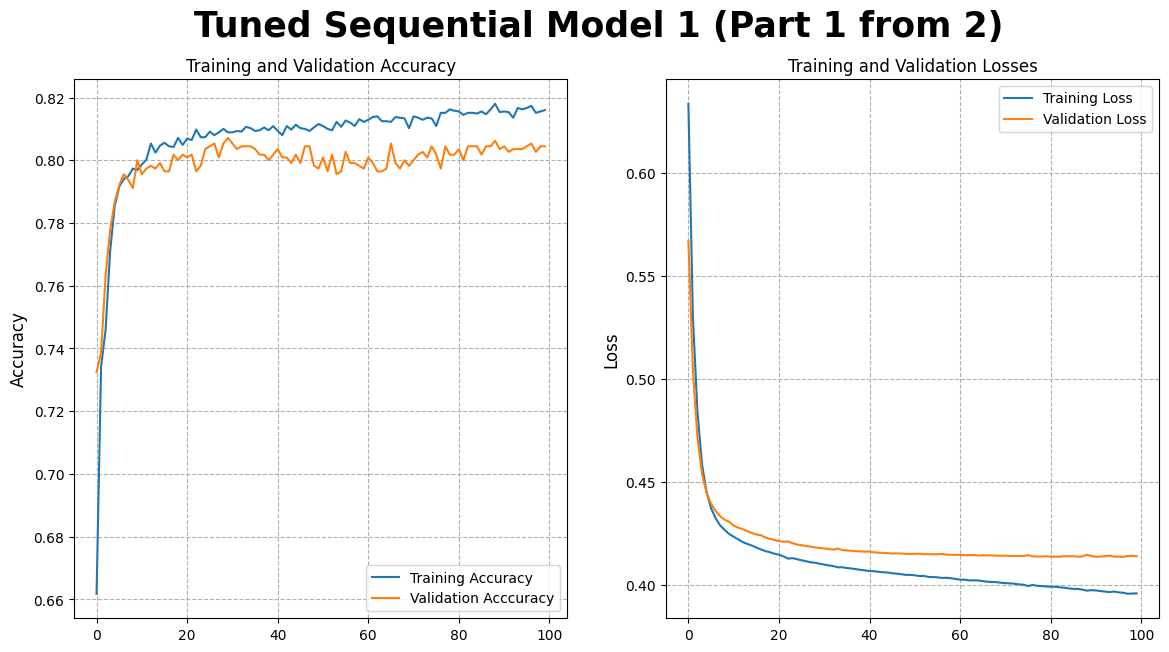

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
fig.suptitle('Tuned Sequential Model 1 (Part 1 from 2)', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq_tnd_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq_tnd_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq_tnd_1.history['loss'], label="Training Loss")
plt.plot(history_sq_tnd_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [ ]:
mdl_sq_tnd_1.trainable = False

### 7.2.4 Tuned Sequential Model (Part 2 from 2)

In [ ]:
n_nrn_sq_tnd_2 = (50, 35) # jumlah neuron di hidden layer adalah 16 dan 8

# Arsitektur Model Sequential
n_feature = X_train_final.shape[1]
mdl_sq_tnd_2 = Sequential()
mdl_sq_tnd_2.add(Input(shape=(n_feature, )))       # Input Layer

for n in n_nrn_sq_tnd_2:                           # Hidden Layer
    mdl_sq_tnd_2.add(Dense(n, activation='relu'))

mdl_sq_tnd_2.add(Dense(1, activation='sigmoid'))   # Output Layer

mdl_sq_tnd_2.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        beta_1=0.5,
        beta_2=0.888
        ), 
    metrics='accuracy'
    )

In [ ]:
mdl_sq_tnd_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                2100      
                                                                 
 dense_7 (Dense)             (None, 35)                1785      
                                                                 
 dense_8 (Dense)             (None, 1)                 36        
                                                                 
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________


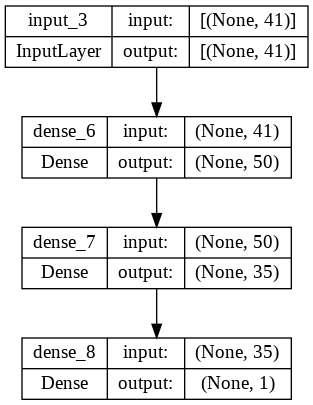

In [ ]:
# Model plotting
tf.keras.utils.plot_model(mdl_sq_tnd_2, show_shapes=True, show_layer_names=True)

In [ ]:
#  Training the model
history_sq_tnd_2 = mdl_sq_tnd_2.fit(train_dataset, validation_data=(val_dataset), epochs = 90)

Epoch 1/90
141/141 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.5387 - val_loss: 0.5911 - val_accuracy: 0.7333
Epoch 2/90
141/141 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7376 - val_loss: 0.5064 - val_accuracy: 0.7369
Epoch 3/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.7444 - val_loss: 0.4686 - val_accuracy: 0.7618
Epoch 4/90
141/141 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7753 - val_loss: 0.4502 - val_accuracy: 0.7893
Epoch 5/90
141/141 [==============================] - 0s 2ms/step - loss: 0.4402 - accuracy: 0.7927 - val_loss: 0.4423 - val_accuracy: 0.7884
Epoch 6/90
141/141 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7929 - val_loss: 0.4384 - val_accuracy: 0.7884
Epoch 7/90
141/141 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7936 - val_loss: 0.4361 - val_accuracy: 0.7911
Epoch 

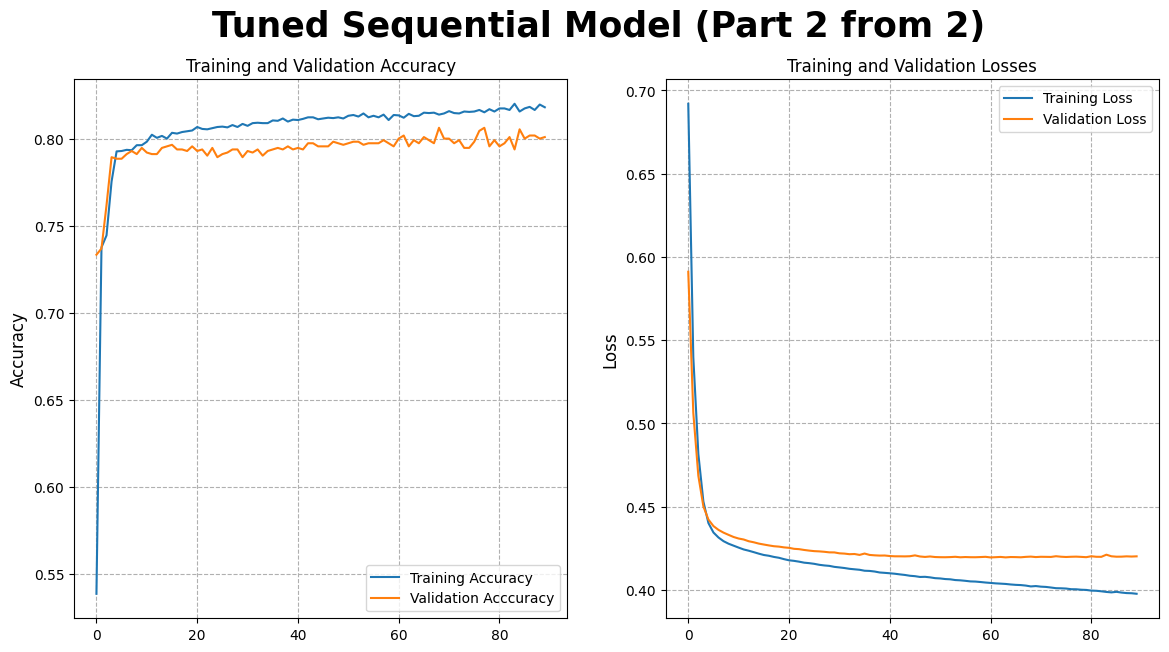

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
fig.suptitle('Tuned Sequential Model (Part 2 from 2)', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_sq_tnd_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_sq_tnd_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_sq_tnd_2.history['loss'], label="Training Loss")
plt.plot(history_sq_tnd_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [ ]:
mdl_sq_tnd_2.trainable = False

## 7.3 Functional Model

### 7.3.1 Defining functional Model

In [ ]:
# Setting up the neuron
n_nrn_fc = (25, 10)
n_feature = X_train_final.shape[1]

# input layer
data_in = Input(shape=(n_feature, ))
hidden_n = data_in

# Hidden Layer
for n in n_nrn_fc:
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n)

# Output Layer
mdl_fc = Model(inputs=data_in, outputs=data_out)

opt_fc = tf.keras.optimizers.Adam()

# Compile Model_Functional
mdl_fc.compile(
    loss= 'binary_crossentropy',
    optimizer=opt_fc,
    metrics=['accuracy']
)

In [ ]:
# Model summary
mdl_fc.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_9 (Dense)             (None, 25)                1050      
                                                                 
 dense_10 (Dense)            (None, 10)                260       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


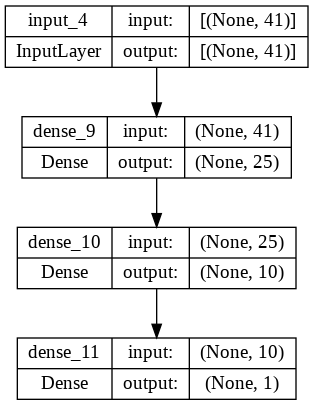

In [ ]:
# Model plotting
tf.keras.utils.plot_model(mdl_fc, show_shapes = True)

### 7.3.2 Training Functional Model

In [ ]:
# Training the model
history_fc_default = mdl_fc.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4810 - accuracy: 0.7596 - val_loss: 0.4398 - val_accuracy: 0.7867
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.7853 - val_loss: 0.4297 - val_accuracy: 0.7867
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7911 - val_loss: 0.4234 - val_accuracy: 0.7982
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8011 - val_loss: 0.4198 - val_accuracy: 0.7938
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7998 - val_loss: 0.4170 - val_accuracy: 0.7947
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8020 - val_loss: 0.4147 - val_accuracy: 0.8000
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8033 - val_loss: 0.4138 - val_accuracy: 0.8009

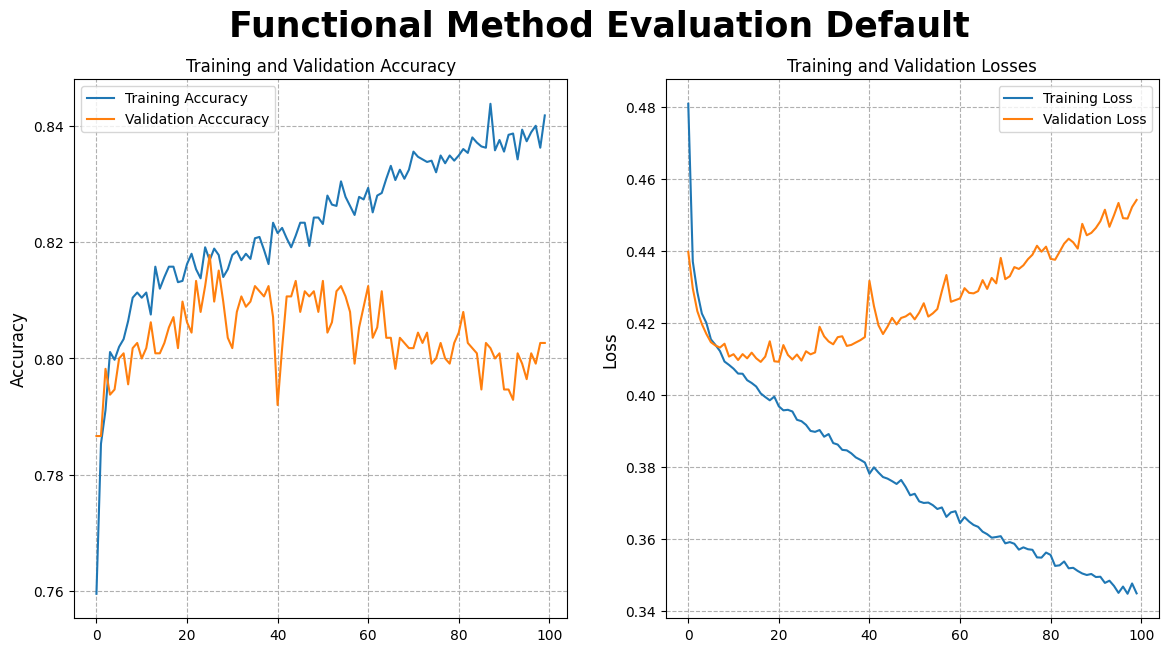

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
fig.suptitle('Functional Method Evaluation Default', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc_default.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc_default.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc_default.history['loss'], label="Training Loss")
plt.plot(history_fc_default.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [ ]:
mdl_fc.trainable = False

### 7.3.3 Tuned Functional Model 1 (1 from 2)

In [ ]:
# Setting up the neuron
n_nrn_fc_tnd_1 = (25, 10)
n_feature = X_train_final.shape[1]

# input layer
data_in = Input(shape=(n_feature, ))
hidden_n = data_in

# Hidden Layer
for n in n_nrn_fc_tnd_1:
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n)

# Output Layer
mdl_fc_tnd_1 = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
mdl_fc_tnd_1.compile(
    loss= 'binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        beta_1=0.5,
        beta_2=0.888
        ),
    metrics=['accuracy']
)

In [ ]:
# Model summary
mdl_fc_tnd_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_12 (Dense)            (None, 25)                1050      
                                                                 
 dense_13 (Dense)            (None, 10)                260       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
history_fc_tnd_1 = mdl_fc_tnd_1.fit(train_dataset, validation_data = (val_dataset), epochs = 100)

Epoch 1/100
141/141 [==============================] - 1s 3ms/step - loss: 0.6287 - accuracy: 0.6747 - val_loss: 0.5789 - val_accuracy: 0.7573
Epoch 2/100
141/141 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7422 - val_loss: 0.5282 - val_accuracy: 0.7484
Epoch 3/100
141/141 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7398 - val_loss: 0.4937 - val_accuracy: 0.7644
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7531 - val_loss: 0.4707 - val_accuracy: 0.7751
Epoch 5/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7684 - val_loss: 0.4554 - val_accuracy: 0.7778
Epoch 6/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7818 - val_loss: 0.4455 - val_accuracy: 0.7884
Epoch 7/100
141/141 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.7829 - val_loss: 0.4389 - val_accuracy: 0.7956

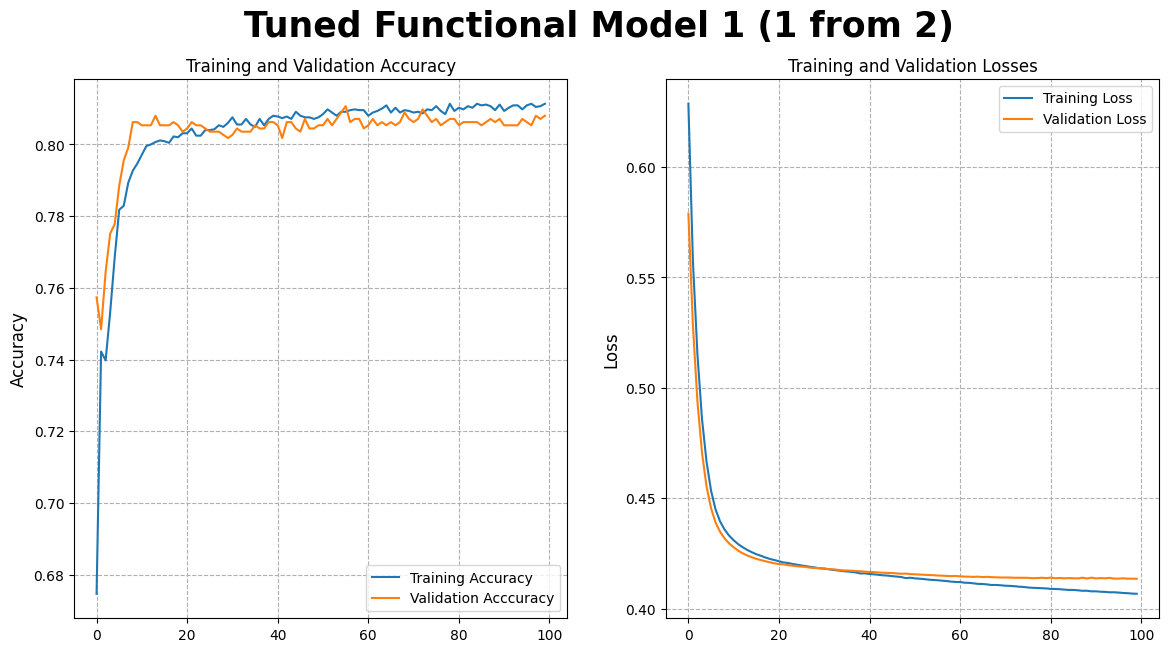

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
fig.suptitle('Tuned Functional Model 1 (1 from 2)', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc_tnd_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc_tnd_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc_tnd_1.history['loss'], label="Training Loss")
plt.plot(history_fc_tnd_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [ ]:
mdl_fc_tnd_1.trainable = False

### 7.3.4 Tuned Functional Model 2 (2 from 2)

In [ ]:
# Setting up the neuron
n_nrn_fc_tnd_2 = (50, 35)
n_feature = X_train_final.shape[1]

# input layer
data_in = Input(shape=(n_feature, ))
hidden_n = data_in

# Hidden Layer
for n in n_nrn_fc_tnd_2:
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n)

# Output Layer
mdl_fc_tnd_2 = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
mdl_fc_tnd_2.compile(
    loss= 'binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        beta_1=0.5,
        beta_2=0.888
        ),
    metrics=['accuracy']
)

In [ ]:
# Model summary
mdl_fc_tnd_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_15 (Dense)            (None, 50)                2100      
                                                                 
 dense_16 (Dense)            (None, 35)                1785      
                                                                 
 dense_17 (Dense)            (None, 1)                 36        
                                                                 
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
history_fc_tnd_2 = mdl_fc_tnd_2.fit(train_dataset, validation_data = (val_dataset), epochs = 50)

Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 0.7261 - accuracy: 0.4729 - val_loss: 0.6055 - val_accuracy: 0.7244
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7333 - val_loss: 0.5164 - val_accuracy: 0.7369
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4977 - accuracy: 0.7407 - val_loss: 0.4769 - val_accuracy: 0.7564
Epoch 4/50
141/141 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7653 - val_loss: 0.4566 - val_accuracy: 0.7671
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4511 - accuracy: 0.7869 - val_loss: 0.4456 - val_accuracy: 0.7787
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.7931 - val_loss: 0.4391 - val_accuracy: 0.7813
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7980 - val_loss: 0.4348 - val_accuracy: 0.7876
Epoch 

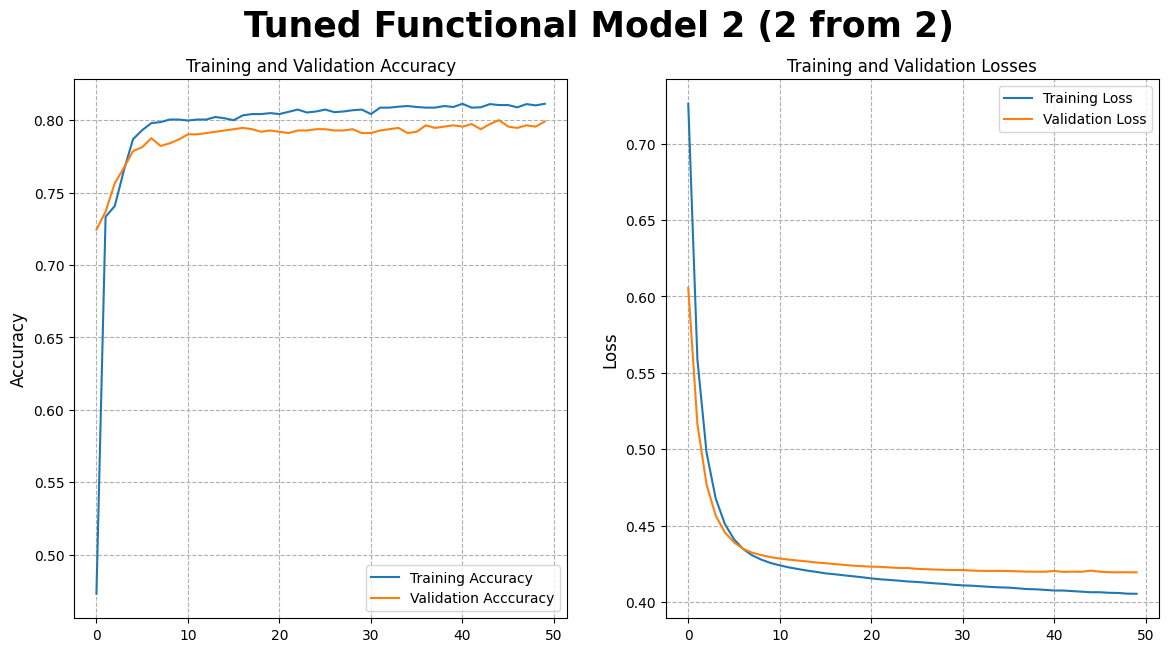

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
fig.suptitle('Tuned Functional Model 2 (2 from 2)', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_fc_tnd_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_fc_tnd_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_fc_tnd_2.history['loss'], label="Training Loss")
plt.plot(history_fc_tnd_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Terlihat bahwa model ini sangat bagus dan bisa dijadikan model untuk deployment.

In [ ]:
mdl_fc_tnd_2.trainable = False

## 7.4 Model Evaluation

Berikut ini saya mengevaluasi 2 model ini dengan confusion matrix.

### 7.4.1 Sequential Model

44/44 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1033
           1       0.54      0.60      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407



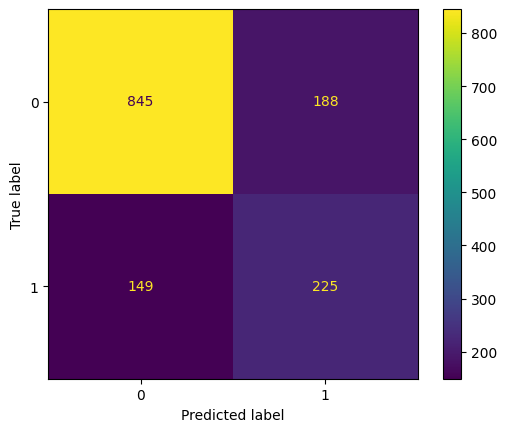

In [ ]:
# predict probabilities
y_pred_seq = mdl_sq_tnd_2.predict(test_dataset)
y_pred_seq = (y_pred_seq > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_seq, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.show()

### 7.4.2 Functional Model

44/44 [==============================] - 0s 1ms/step
========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.79      0.78      0.78      1407



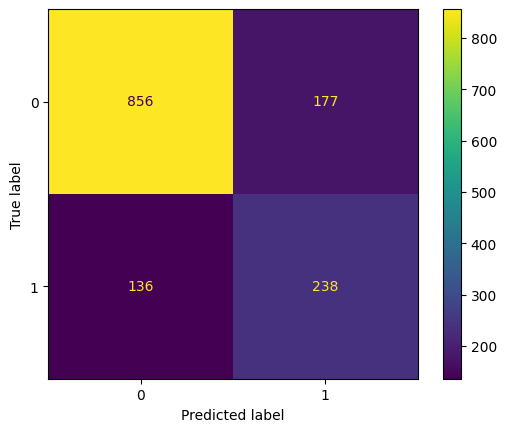

In [ ]:
# predict probabilities
y_pred_func = mdl_fc_tnd_2.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# classification report
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_func, zero_division=0))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.show()

## 7.5 Model Selection Conclusion

Dari ke enam model training ini yang berupa:

1. Model Deep Learning Sequential Default, 100 epoch
2. Model Deep Learning Sequential Tuned 1, 100 epoch
3. Model Deep Learning Sequential Tuned 2, 90 epoch
4. Model Deep Learning Functional Default, 100 epoch
5. Model Deep Learning Functional Tuned 1, 100 epoch
6. Model Deep Learning Functional Tuned 2, 50 Epoch

Terpilih Model Deep Learning Functional Tuned, 50 epoch. Berdasarkan antara akurasi training dan akurasi validasi dengan gap terkecil yaitu 0.0027. Yang membuktikan bagusnya model Deep Learning ini. Model Functional tuned kedua memounyai kekurangan pada confusion matrix, dimana terdapat false negative yang banyak (yang seharusnya dihindari perusahaan). Namun, false negative tersebut mendekati dengan model sequential.

## **VIII. MODEL INFERENCE**

Untuk mencoba jalannya algoritma ini, maka saya memasukan data inferensial

In [ ]:
df_inf = pd.DataFrame([
    ['0','yes','No',1,'No phone service','DSL','No','Yes','No','No','No','No','Month-to-month','Yes','Electronic check',29.77], 
    ['0', 'No','Yes',34,'No', 'DSL','Yes','No','Yes','No','No','No','One year','No','Mailed check',1889.50]], 
columns=['SeniorCitizen', 'Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges'])
df_inf

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.77
1,0,No,Yes,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50


In [ ]:
# Pipeline for Data Preprocessing for deployment app.
inf_num = X_train_num.columns.values
inf_cat = X_train_cat.columns.values
sclr_pipe = Pipeline([('Scaled', scaler)])
encdr_pipe = Pipeline([('Encoded', encoder)])

preproc_pipe = ColumnTransformer(transformers=[('Numerical', sclr_pipe, inf_num), ('Categorical', encdr_pipe, inf_cat)])

preproc_pipe.fit(X_train)

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('Scaled', MinMaxScaler())]),
                                 array(['tenure', 'TotalCharges'], dtype=object)),
                                ('Categorical',
                                 Pipeline(steps=[('Encoded',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 array(['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object))])

In [ ]:
# Transform inference dataset.
df_inf_final = preproc_pipe.transform(df_inf)

In [ ]:
prd_inf = mdl_fc_tnd_2.predict(df_inf_final)
prd_inf_df = pd.DataFrame(np.round_(prd_inf), columns=['Predicted Churn'])
prd_inf_df

1/1 [==============================] - 0s 58ms/step


,Predicted Churn
0,1.0
1,0.0


In [ ]:
pd.concat([df_inf, prd_inf_df], axis=1)

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Predicted Churn
0,0,yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.77,1.0
1,0,No,Yes,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,0.0


In [ ]:
pickle.dump(preproc_pipe, open('model_milestones1.pkl','wb'))

In [ ]:
mdl_fc_tnd_2.save('churn_model.h5')

# **X. CONCLUSION**

Akhirnya prediksi data churn dapat dilakukan dengan model deep learning yang sudah mencoba model deep learning sequential dan functional dan dilakukan tuning 2 kali untuk mencapai akaurasi yang tinggi. 1 saran untuk dataset ini:

1. Terdapat kesalahan dalam memasukan data pada kolom TotalCharges yang berakibat diperlukannya merapikan data tersebut atau analisis akan susah diproses.